Dados

In [9]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta

# Gerando dados
np.random.seed(42)
num_records = 1000

# Listas de opções
produtos = ['Produto A', 'Produto B', 'Produto C', 'Produto D', 'Produto E']
categorias = ['Eletrônicos', 'Roupas', 'Alimentos', 'Bebidas', 'Cosméticos']

# Gerando os dados
data = {
    'Produto': [random.choice(produtos) for _ in range(num_records)],
    'Categoria': [random.choice(categorias) for _ in range(num_records)],
    'Vendas': np.random.randint(1, 500, size=num_records),
    'Receita': np.random.randint(20, 10000, size=num_records),
    'Desconto': np.random.uniform(0, 30, size=num_records),
    'Custo': np.random.randint(10, 5000, size=num_records),
    'Data': [datetime.now() - timedelta(days=random.randint(1, 365)) for _ in range(num_records)]
}

df_grande = pd.DataFrame(data)

df_grande.head()

,Produto,Categoria,Vendas,Receita,Desconto,Custo,Data
0,Produto B,Roupas,103,7469,28.823417,2712,2024-08-03 22:13:43.632436
1,Produto A,Cosméticos,436,4178,12.477221,4016,2024-05-05 22:13:43.632436
2,Produto A,Roupas,349,3945,25.387359,3878,2024-07-15 22:13:43.632436
3,Produto A,Roupas,271,6990,18.862945,4210,2024-06-12 22:13:43.632436
4,Produto D,Bebidas,107,6958,22.060509,211,2024-03-22 22:13:43.632436


Analise Descritiva Detalhada

Estatisticas Detalhadas

In [10]:
# Estatísticas descritivas gerais
estatisticas_gerais = df_grande.describe()

estatisticas_gerais

,Vendas,Receita,Desconto,Custo,Data
count,1000.000000,1000.00000,1000.000000,1000.000000,1000
mean,250.968000,4976.02200,14.803237,2590.624000,2024-02-13 17:47:19.635597568
min,1.000000,21.00000,0.005652,16.000000,2023-08-15 22:13:43.632436
25%,134.750000,2480.25000,7.308361,1447.000000,2023-11-15 16:13:43.633936896
50%,247.000000,4918.00000,14.883213,2618.000000,2024-02-11 22:13:43.636436480
75%,373.000000,7402.00000,22.190582,3761.250000,2024-05-15 22:13:43.633436928
max,499.000000,9997.00000,29.912345,4996.000000,2024-08-13 22:13:43.637437
std,141.192593,2850.76472,8.556894,1400.319798,NaN


Distribuição de Frequência

In [15]:
# Contagem de frequência por categoria
distribuicao_categoria = df_grande['Categoria'].value_counts()

distribuicao_categoria

Categoria
Roupas         224
Alimentos      200
Bebidas        198
Eletrônicos    193
Cosméticos     185
Name: count, dtype: int64

In [20]:
# Convertendo as colunas numéricas para o tipo correto (caso necessário)
df_grande['Vendas'] = pd.to_numeric(df_grande['Vendas'], errors='coerce')
df_grande['Receita'] = pd.to_numeric(df_grande['Receita'], errors='coerce')
df_grande['Desconto'] = pd.to_numeric(df_grande['Desconto'], errors='coerce')
df_grande['Custo'] = pd.to_numeric(df_grande['Custo'], errors='coerce')

# Selecionar apenas as colunas numéricas novamente
df_numerico = df_grande[['Vendas', 'Receita', 'Desconto', 'Custo']]

# Matriz de correlação
correlacao = df_numerico.corr()

correlacao

,Vendas,Receita,Desconto,Custo
Vendas,1.000000,-0.031775,-0.007445,-0.044864
Receita,-0.031775,1.000000,0.027995,0.023478
Desconto,-0.007445,0.027995,1.000000,-0.019723
Custo,-0.044864,0.023478,-0.019723,1.000000


## Análise da Matriz de Correlação

A matriz de correlação gerada mostra os coeficientes de correlação entre as variáveis numéricas do conjunto de dados: `Vendas`, `Receita`, `Desconto`, e `Custo`. Os coeficientes variam de -1 a 1, onde:

- **1** indica uma correlação perfeita positiva (quando uma variável aumenta, a outra também aumenta).
- **-1** indica uma correlação perfeita negativa (quando uma variável aumenta, a outra diminui).
- **0** indica que não há correlação linear entre as variáveis.

### 1. Vendas vs Receita: `-0.031775`
- A correlação entre `Vendas` e `Receita` é de aproximadamente `-0.032`, indicando uma correlação muito fraca e negativa. Isso sugere que, neste conjunto de dados específico, as quantidades vendidas não estão fortemente associadas ao valor total gerado em receita. Isso pode ser explicado por uma grande variação nos preços ou descontos aplicados, ou pode indicar que os dados têm alguma inconsistência.

### 2. Vendas vs Desconto: `-0.007445`
- A correlação entre `Vendas` e `Desconto` é de aproximadamente `-0.007`, indicando praticamente nenhuma correlação. Isso sugere que o percentual de desconto aplicado não está influenciando significativamente o número de unidades vendidas. Em um cenário real, poderíamos esperar uma correlação negativa mais forte se descontos maiores estivessem associados a um aumento nas vendas.

### 3. Vendas vs Custo: `-0.044864`
- A correlação entre `Vendas` e `Custo` é de aproximadamente `-0.045`, também muito fraca e negativa. Isso sugere que o custo dos produtos não está fortemente relacionado ao número de unidades vendidas. Em alguns casos, poderíamos esperar uma correlação mais clara, dependendo da elasticidade de preço ou da estratégia de pricing.

### 4. Receita vs Desconto: `0.027995`
- A correlação entre `Receita` e `Desconto` é de aproximadamente `0.028`, o que indica uma correlação muito fraca e positiva. Isso sugere que, neste caso, maiores descontos não estão impactando significativamente o valor total da receita, o que pode indicar que os descontos não estão sendo efetivamente aplicados em produtos de alto valor ou não estão impulsionando significativamente as vendas.

### 5. Receita vs Custo: `0.023478`
- A correlação entre `Receita` e `Custo` é de aproximadamente `0.023`, também muito fraca e positiva. Isso sugere que o custo dos produtos tem uma correlação mínima com a receita gerada, possivelmente devido a uma grande variação nos preços de venda ou margens de lucro.

### 6. Desconto vs Custo: `-0.019723`
- A correlação entre `Desconto` e `Custo` é de aproximadamente `-0.020`, sugerindo uma correlação muito fraca e negativa. Isso indica que o percentual de desconto aplicado não tem uma relação significativa com o custo dos produtos.

### Interpretação Geral

A matriz de correlação mostra que, neste conjunto de dados específico, as variáveis numéricas não estão fortemente correlacionadas umas com as outras. Isso pode indicar que outros fatores não incluídos no conjunto de dados têm um impacto maior nas vendas, receita, e outros aspectos financeiros, ou que os dados contêm uma alta variabilidade que mascara as correlações.

Em um cenário real, essas informações sugeririam que talvez seja necessário:

- Revisitar a qualidade dos dados para verificar se eles são representativos.
- Considerar outros fatores que podem estar influenciando as vendas e receitas, como sazonalidade, campanhas de marketing, ou características específicas dos produtos.
- Realizar uma análise mais segmentada, por exemplo, por categorias de produtos, períodos de tempo, ou faixas de preço.

Agrupamento e Análise de Dados Agrupados

In [22]:
# Agrupando por categoria e calculando a soma das vendas e receita média
vendas_receita_categoria = df_grande.groupby('Categoria').agg({
    'Vendas': 'sum',
    'Receita': 'mean',
    'Desconto': 'mean',
    'Custo': 'mean'
}).reset_index()

vendas_receita_categoria

,Categoria,Vendas,Receita,Desconto,Custo
0,Alimentos,50609,4875.665000,15.442491,2633.195000
1,Bebidas,53203,4911.010101,14.265159,2715.727273
2,Cosméticos,43998,5011.545946,15.194794,2510.329730
3,Eletrônicos,49135,5033.777202,15.216769,2467.502591
4,Roupas,54023,5043.991071,14.028411,2614.428571


Analise Temporal

In [24]:
# Convertendo a coluna 'Data' para o tipo datetime (caso não esteja)
df_grande['Data'] = pd.to_datetime(df_grande['Data'])

# Agrupando por mês e calculando a soma das vendas
vendas_por_mes = df_grande.resample('ME', on='Data')['Vendas'].sum()

vendas_por_mes

Data
2023-08-31    14373
2023-09-30    21789
2023-10-31    15295
2023-11-30    19189
2023-12-31    24128
2024-01-31    21996
2024-02-29    19668
2024-03-31    17800
2024-04-30    24144
2024-05-31    22533
2024-06-30    19995
2024-07-31    19368
2024-08-31    10690
Freq: ME, Name: Vendas, dtype: int32

Visualizações Avançadas

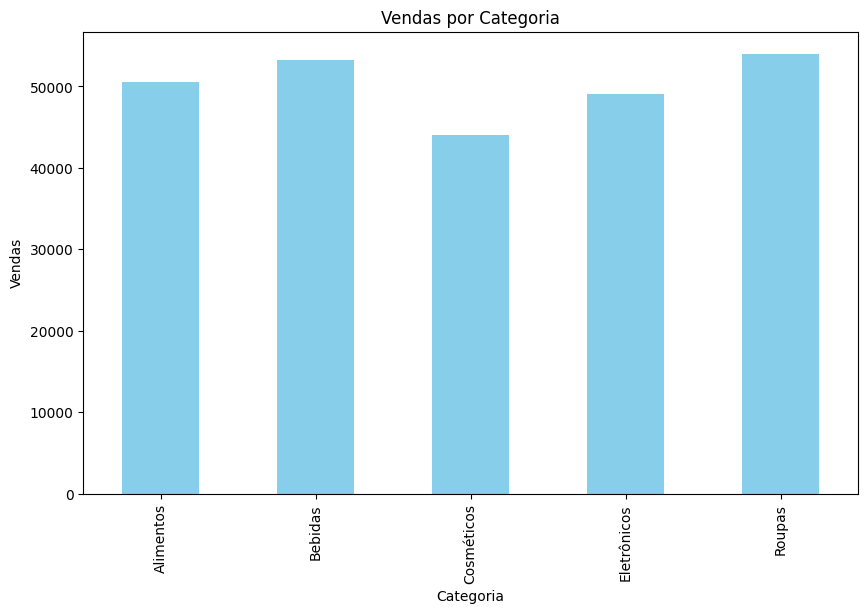

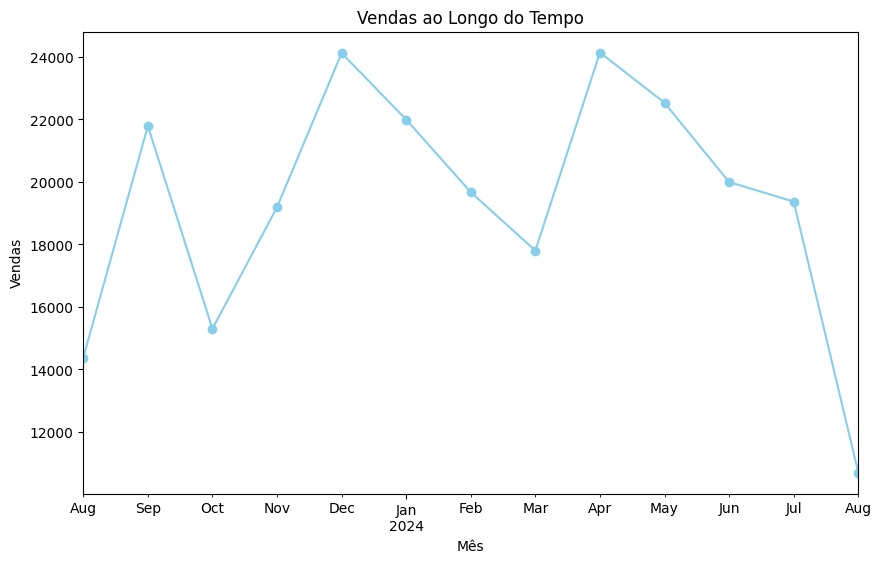

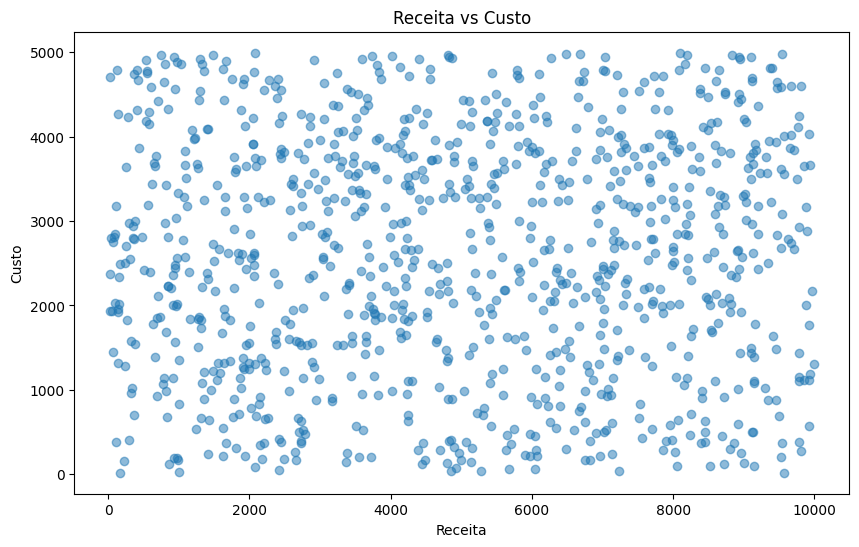

In [61]:
import matplotlib.pyplot as plt

# Gráfico de barras de vendas por categoria
plt.figure(figsize=(10, 6))
df_grande.groupby('Categoria')['Vendas'].sum().plot(kind='bar', color='skyblue')
plt.xlabel('Categoria')
plt.ylabel('Vendas')
plt.title('Vendas por Categoria')
plt.show()

# Gráfico de linha das vendas ao longo do tempo
plt.figure(figsize=(10, 6))
vendas_por_mes.plot(kind='line', marker='o',color='skyblue')
plt.xlabel('Mês')
plt.ylabel('Vendas')
plt.title('Vendas ao Longo do Tempo')
plt.show()

# Gráfico de dispersão de Receita vs Custo
plt.figure(figsize=(10, 6))
plt.scatter(df_grande['Receita'], df_grande['Custo'], alpha=0.5)
plt.xlabel('Receita')
plt.ylabel('Custo')
plt.title('Receita vs Custo')
plt.show()